## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0004995	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9794482	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9595002	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9419304	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9240293	total: 63.2ms	remaining: 12.6s
5:	learn: 0.9091210	total: 64.6ms	remaining: 10.7s
6:	learn: 0.8936735	total: 65.6ms	remaining: 9.31s
7:	learn: 0.8770670	total: 66.5ms	remaining: 8.25s
8:	learn: 0.8606437	total: 67.6ms	remaining: 7.45s
9:	learn: 0.8441695	total: 68.8ms	remaining: 6.81s
10:	learn: 0.8281115	total: 70.2ms	remaining: 6.31s
11:	learn: 0.8124250	total: 71.5ms	remaining: 5.89s
12:	learn: 0.7970555	total: 72.4ms	remaining: 5.5s
13:	learn: 0.7818463	total: 73.4ms	remaining: 5.17s
14:	learn: 0.7693402	total: 74.3ms	remaining: 4.88s
15:	learn: 0.7553163	total: 75.1ms	remaining: 4.62s
16:	learn: 0.7431199	total: 76.1ms	remaining: 4.4s
17:	learn: 0.7293922	total: 76.8ms	remaining: 4.19s
18:	learn: 0.7167997	total: 77.7ms	remaining: 

22:	learn: 0.6660917	total: 81.5ms	remaining: 3.46s
23:	learn: 0.6556955	total: 82.5ms	remaining: 3.36s
24:	learn: 0.6445121	total: 84.2ms	remaining: 3.28s
25:	learn: 0.6354279	total: 85.3ms	remaining: 3.19s
26:	learn: 0.6265932	total: 86.3ms	remaining: 3.11s
27:	learn: 0.6177440	total: 87.2ms	remaining: 3.03s
28:	learn: 0.6078317	total: 88.2ms	remaining: 2.95s
29:	learn: 0.5974441	total: 89ms	remaining: 2.88s
30:	learn: 0.5871216	total: 89.8ms	remaining: 2.81s
31:	learn: 0.5789280	total: 90.6ms	remaining: 2.74s
32:	learn: 0.5716789	total: 91.5ms	remaining: 2.68s
33:	learn: 0.5639613	total: 92.3ms	remaining: 2.62s
34:	learn: 0.5576367	total: 93.4ms	remaining: 2.57s
35:	learn: 0.5500625	total: 94.4ms	remaining: 2.53s
36:	learn: 0.5427960	total: 95.3ms	remaining: 2.48s
37:	learn: 0.5357830	total: 96.2ms	remaining: 2.44s
38:	learn: 0.5284597	total: 97ms	remaining: 2.39s
39:	learn: 0.5203240	total: 97.8ms	remaining: 2.35s
40:	learn: 0.5146939	total: 98.6ms	remaining: 2.31s
41:	learn: 0.506

142:	learn: 0.2525396	total: 192ms	remaining: 1.15s
143:	learn: 0.2517739	total: 193ms	remaining: 1.15s
144:	learn: 0.2509419	total: 196ms	remaining: 1.16s
145:	learn: 0.2501401	total: 197ms	remaining: 1.15s
146:	learn: 0.2493593	total: 198ms	remaining: 1.15s
147:	learn: 0.2485475	total: 199ms	remaining: 1.14s
148:	learn: 0.2479845	total: 200ms	remaining: 1.14s
149:	learn: 0.2472398	total: 201ms	remaining: 1.14s
150:	learn: 0.2459727	total: 202ms	remaining: 1.13s
151:	learn: 0.2451692	total: 203ms	remaining: 1.13s
152:	learn: 0.2446073	total: 204ms	remaining: 1.13s
153:	learn: 0.2435971	total: 204ms	remaining: 1.12s
154:	learn: 0.2427982	total: 206ms	remaining: 1.12s
155:	learn: 0.2419147	total: 207ms	remaining: 1.12s
156:	learn: 0.2409448	total: 208ms	remaining: 1.11s
157:	learn: 0.2399685	total: 209ms	remaining: 1.11s
158:	learn: 0.2391198	total: 210ms	remaining: 1.11s
159:	learn: 0.2385640	total: 211ms	remaining: 1.1s
160:	learn: 0.2377173	total: 211ms	remaining: 1.1s
161:	learn: 0.

228:	learn: 0.2060118	total: 272ms	remaining: 917ms
229:	learn: 0.2056117	total: 273ms	remaining: 915ms
230:	learn: 0.2055194	total: 274ms	remaining: 913ms
231:	learn: 0.2050044	total: 275ms	remaining: 911ms
232:	learn: 0.2047346	total: 276ms	remaining: 909ms
233:	learn: 0.2045614	total: 277ms	remaining: 906ms
234:	learn: 0.2043873	total: 278ms	remaining: 904ms
235:	learn: 0.2039883	total: 279ms	remaining: 902ms
236:	learn: 0.2035825	total: 279ms	remaining: 900ms
237:	learn: 0.2030954	total: 280ms	remaining: 898ms
238:	learn: 0.2028738	total: 281ms	remaining: 895ms
239:	learn: 0.2024170	total: 282ms	remaining: 893ms
240:	learn: 0.2021748	total: 283ms	remaining: 891ms
241:	learn: 0.2015797	total: 284ms	remaining: 889ms
242:	learn: 0.2011354	total: 285ms	remaining: 887ms
243:	learn: 0.2006199	total: 286ms	remaining: 885ms
244:	learn: 0.2001114	total: 286ms	remaining: 882ms
245:	learn: 0.1996355	total: 287ms	remaining: 880ms
246:	learn: 0.1993966	total: 288ms	remaining: 878ms
247:	learn: 

350:	learn: 0.1643849	total: 383ms	remaining: 707ms
351:	learn: 0.1640039	total: 384ms	remaining: 706ms
352:	learn: 0.1636744	total: 385ms	remaining: 705ms
353:	learn: 0.1632185	total: 386ms	remaining: 704ms
354:	learn: 0.1631927	total: 387ms	remaining: 702ms
355:	learn: 0.1628375	total: 387ms	remaining: 701ms
356:	learn: 0.1625627	total: 388ms	remaining: 699ms
357:	learn: 0.1623676	total: 389ms	remaining: 698ms
358:	learn: 0.1618982	total: 390ms	remaining: 696ms
359:	learn: 0.1616743	total: 391ms	remaining: 694ms
360:	learn: 0.1612265	total: 391ms	remaining: 693ms
361:	learn: 0.1608691	total: 393ms	remaining: 693ms
362:	learn: 0.1605801	total: 394ms	remaining: 691ms
363:	learn: 0.1600473	total: 395ms	remaining: 690ms
364:	learn: 0.1597778	total: 396ms	remaining: 688ms
365:	learn: 0.1594490	total: 396ms	remaining: 687ms
366:	learn: 0.1591345	total: 397ms	remaining: 685ms
367:	learn: 0.1588028	total: 398ms	remaining: 684ms
368:	learn: 0.1585188	total: 399ms	remaining: 682ms
369:	learn: 

439:	learn: 0.1395417	total: 463ms	remaining: 590ms
440:	learn: 0.1391746	total: 464ms	remaining: 588ms
441:	learn: 0.1387109	total: 465ms	remaining: 587ms
442:	learn: 0.1385507	total: 466ms	remaining: 586ms
443:	learn: 0.1382692	total: 468ms	remaining: 585ms
444:	learn: 0.1382052	total: 469ms	remaining: 584ms
445:	learn: 0.1380960	total: 470ms	remaining: 583ms
446:	learn: 0.1378004	total: 471ms	remaining: 582ms
447:	learn: 0.1374826	total: 472ms	remaining: 581ms
448:	learn: 0.1373492	total: 473ms	remaining: 580ms
449:	learn: 0.1372036	total: 473ms	remaining: 579ms
450:	learn: 0.1369743	total: 474ms	remaining: 577ms
451:	learn: 0.1366198	total: 475ms	remaining: 576ms
452:	learn: 0.1363801	total: 476ms	remaining: 575ms
453:	learn: 0.1363040	total: 477ms	remaining: 573ms
454:	learn: 0.1360672	total: 478ms	remaining: 572ms
455:	learn: 0.1356540	total: 478ms	remaining: 571ms
456:	learn: 0.1355325	total: 479ms	remaining: 570ms
457:	learn: 0.1353498	total: 480ms	remaining: 568ms
458:	learn: 

563:	learn: 0.1130027	total: 574ms	remaining: 444ms
564:	learn: 0.1129071	total: 575ms	remaining: 443ms
565:	learn: 0.1127754	total: 576ms	remaining: 442ms
566:	learn: 0.1126822	total: 577ms	remaining: 441ms
567:	learn: 0.1123877	total: 578ms	remaining: 440ms
568:	learn: 0.1123377	total: 579ms	remaining: 439ms
569:	learn: 0.1120586	total: 580ms	remaining: 438ms
570:	learn: 0.1118299	total: 581ms	remaining: 436ms
571:	learn: 0.1116610	total: 582ms	remaining: 435ms
572:	learn: 0.1114083	total: 583ms	remaining: 434ms
573:	learn: 0.1111690	total: 584ms	remaining: 433ms
574:	learn: 0.1109426	total: 584ms	remaining: 432ms
575:	learn: 0.1107080	total: 585ms	remaining: 431ms
576:	learn: 0.1106000	total: 586ms	remaining: 430ms
577:	learn: 0.1104898	total: 587ms	remaining: 429ms
578:	learn: 0.1102718	total: 588ms	remaining: 427ms
579:	learn: 0.1100453	total: 589ms	remaining: 426ms
580:	learn: 0.1098714	total: 589ms	remaining: 425ms
581:	learn: 0.1096884	total: 590ms	remaining: 424ms
582:	learn: 

651:	learn: 0.0989170	total: 654ms	remaining: 349ms
652:	learn: 0.0987844	total: 655ms	remaining: 348ms
653:	learn: 0.0985881	total: 656ms	remaining: 347ms
654:	learn: 0.0984301	total: 657ms	remaining: 346ms
655:	learn: 0.0983750	total: 658ms	remaining: 345ms
656:	learn: 0.0981870	total: 659ms	remaining: 344ms
657:	learn: 0.0979873	total: 660ms	remaining: 343ms
658:	learn: 0.0977781	total: 661ms	remaining: 342ms
659:	learn: 0.0977627	total: 661ms	remaining: 341ms
660:	learn: 0.0975828	total: 662ms	remaining: 340ms
661:	learn: 0.0974405	total: 663ms	remaining: 339ms
662:	learn: 0.0972975	total: 664ms	remaining: 338ms
663:	learn: 0.0971822	total: 665ms	remaining: 337ms
664:	learn: 0.0969631	total: 666ms	remaining: 335ms
665:	learn: 0.0969374	total: 667ms	remaining: 334ms
666:	learn: 0.0967391	total: 668ms	remaining: 333ms
667:	learn: 0.0965516	total: 669ms	remaining: 332ms
668:	learn: 0.0963142	total: 670ms	remaining: 331ms
669:	learn: 0.0961748	total: 670ms	remaining: 330ms
670:	learn: 

774:	learn: 0.0840172	total: 765ms	remaining: 222ms
775:	learn: 0.0839210	total: 766ms	remaining: 221ms
776:	learn: 0.0839105	total: 767ms	remaining: 220ms
777:	learn: 0.0837223	total: 768ms	remaining: 219ms
778:	learn: 0.0836706	total: 769ms	remaining: 218ms
779:	learn: 0.0834540	total: 769ms	remaining: 217ms
780:	learn: 0.0833042	total: 770ms	remaining: 216ms
781:	learn: 0.0832146	total: 771ms	remaining: 215ms
782:	learn: 0.0830926	total: 772ms	remaining: 214ms
783:	learn: 0.0829133	total: 773ms	remaining: 213ms
784:	learn: 0.0828376	total: 774ms	remaining: 212ms
785:	learn: 0.0827635	total: 775ms	remaining: 211ms
786:	learn: 0.0826373	total: 776ms	remaining: 210ms
787:	learn: 0.0826185	total: 777ms	remaining: 209ms
788:	learn: 0.0826064	total: 778ms	remaining: 208ms
789:	learn: 0.0825407	total: 779ms	remaining: 207ms
790:	learn: 0.0825224	total: 780ms	remaining: 206ms
791:	learn: 0.0824322	total: 781ms	remaining: 205ms
792:	learn: 0.0823006	total: 781ms	remaining: 204ms
793:	learn: 

866:	learn: 0.0741027	total: 845ms	remaining: 130ms
867:	learn: 0.0740186	total: 846ms	remaining: 129ms
868:	learn: 0.0739541	total: 847ms	remaining: 128ms
869:	learn: 0.0738847	total: 848ms	remaining: 127ms
870:	learn: 0.0737655	total: 849ms	remaining: 126ms
871:	learn: 0.0737492	total: 849ms	remaining: 125ms
872:	learn: 0.0736448	total: 850ms	remaining: 124ms
873:	learn: 0.0735154	total: 851ms	remaining: 123ms
874:	learn: 0.0734674	total: 852ms	remaining: 122ms
875:	learn: 0.0734552	total: 853ms	remaining: 121ms
876:	learn: 0.0733693	total: 854ms	remaining: 120ms
877:	learn: 0.0733232	total: 854ms	remaining: 119ms
878:	learn: 0.0731999	total: 855ms	remaining: 118ms
879:	learn: 0.0730860	total: 856ms	remaining: 117ms
880:	learn: 0.0729565	total: 857ms	remaining: 116ms
881:	learn: 0.0728644	total: 858ms	remaining: 115ms
882:	learn: 0.0728015	total: 858ms	remaining: 114ms
883:	learn: 0.0726728	total: 859ms	remaining: 113ms
884:	learn: 0.0725634	total: 860ms	remaining: 112ms
885:	learn: 

996:	learn: 0.0629870	total: 957ms	remaining: 2.88ms
997:	learn: 0.0628870	total: 958ms	remaining: 1.92ms
998:	learn: 0.0628066	total: 958ms	remaining: 959us
999:	learn: 0.0627295	total: 959ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

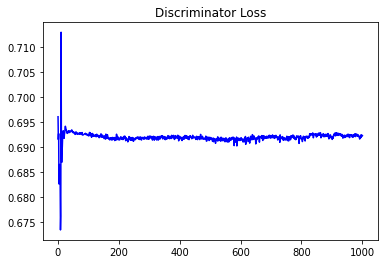

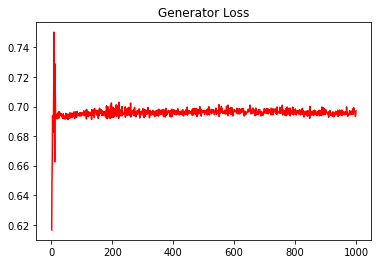

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1414444374911198


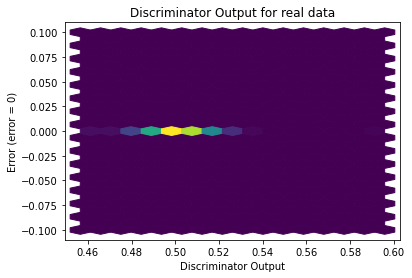

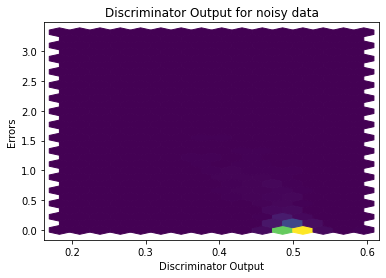

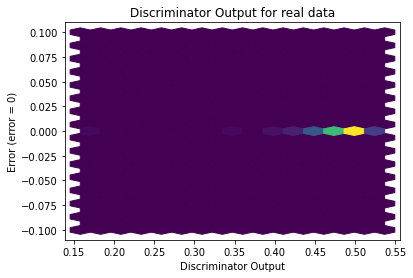

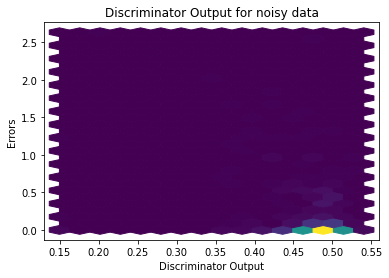

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


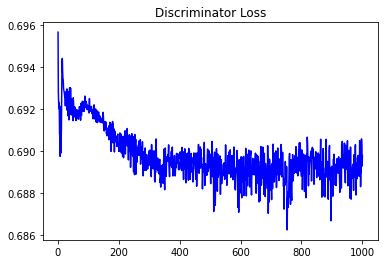

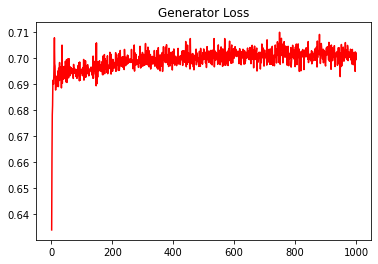

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17076363399280367


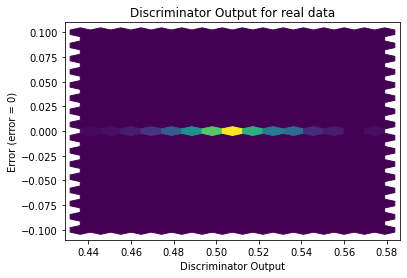

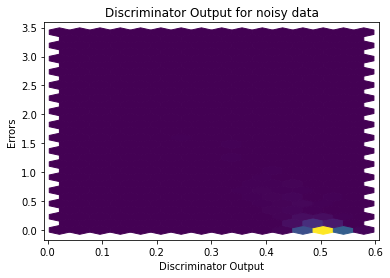

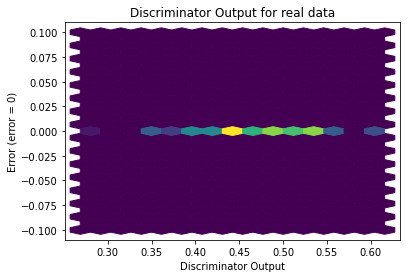

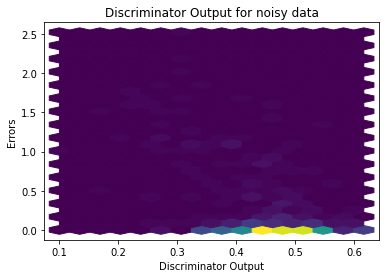

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8623]], requires_grad=True)
